<a href="https://colab.research.google.com/github/UTDataMining/2022A/blob/main/ex8/ex8_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX8 Linear Regression

Points
- Q1 1
- Q2 1
- Q3 5
- Q4 3


In [ ]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex8/iris.csv

## Q1 Correlation coefficient
The following scatterplot shows the relationship between `petal_length` and `petal_width` features of the iris dataset.


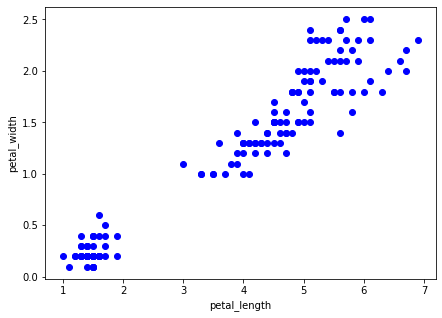

In [ ]:
iris = pd.read_csv('iris.csv')

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(iris['petal_length'], iris['petal_width'], c='blue');

Complete the following `petal_corr` function that takes `petal_length` and `petal_width` features of the iris dataset, as `NumPy` arrays, with the arguments `x` and `y` respectively, and returns their correlation coefficient.

In [ ]:
def petal_corr(x,y):
    return ...

Once the `petal_corr` function is complete, run the following cell. Your function should return $\simeq0.96$.


In [ ]:
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

petal_corr(X, y)

## Q2 Normalization

In the following, let us consider learning the parameters of our hypothetical function to predict `petal_width` from `petal_length` using linear regression.

First, as a preparation, consider normalizing both `petal_length` (as input $X$) and `petal_length` (as output $y$).

Complete the following `normalizer` function that takes a `NumPy` 2D array of any number of rows and columns with the argument `mat` and returns an array with each element value normalized based on the mean and standard deviation of its column.


In [ ]:
def normalizer(mat):
    return ...

Once the `normalizer` function is complete, run the following cell. 
Make sure that each column of `X` column (in this case, checking its 1st column) is normalized to mean 0 and standard deviation 1.


In [ ]:
print(np.round(np.mean(normalizer(X), axis=0))[0])
print(np.round(np.std(normalizer(X), axis=0))[0])

In the following, we add a bias term ($x_0=1$) by inserting a column vector with elements of 1 in the first column of `X`. As a result, we now have the following matrix ($m \times 2$) and vector ($m \times 1$) for our input and output data respectively.

$
  X = \left(
    \begin{array}{cc}
      1 &   x^{(1)} \\
      1 &   x^{(2)}  \\
      ... & ... \\
      1 &  x^{(m)}
    \end{array}
  \right)
$

($x^{(i)}$: normalized `petal_length`)

$
  y = \left(
    \begin{array}{c}
       y^{(1)}  \\
      ...\\
        y^{(m)}  \\
    \end{array}
  \right)
$

($y^{(i)}$: normalized `petal_width`)

In [ ]:
X_norm = normalizer(X) # 入力の標準化
y_norm = normalizer(y) # 出力の標準化

X_norm = np.hstack([np.ones((X.shape[0],1)), X_norm]) # バイアス項の追加

print(X_norm[:10,:]) # 先頭10行のデータ
print(y_norm[:10]) # 先頭10行のデータ

## Q3 Gradient descent
In the following, we implement the `graddes` function that learns the parameters of a hypothetical function using the gradient descent method. The `graddes` function is trained based on the training data so that it can predict the output from the input.

The `graddes` function takes the input data (number of data ($m$)$\times$(number of features + bias)($n$)), the output data ($m\times1$), the learning rate, and the number of training iterations (each iteration is called an epoch) with the arguments `X`, `y`, `alpha`, and `n_iter` respectively.

The `graddes` function learns the parameters and then returns:
- A list consisting of the costs of each iteration
- An array of the parameters ($n\times1$)

#### Model training
Let parameters be

$\theta=(\theta_0, \theta_1, ..., \theta_{n-1})^T$,

a hypothetical function (model) be

$h(x)=\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n-1}x_{n-1}$,

an input be

$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n-1}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n-1}^{(m)}  \\
    \end{array}
  \right)
$

(where $x_0^{(i)}=1$),

and an output be

$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$.

Given the following cost function

$J(\theta)=\frac{1}{2m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})^2$,

we update the parameter $\theta_j$ corresponding the feature $x_j$ of $X$ using the gradient descent method as follows:

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$

The entire parameters can also be updated at once as follows:

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta-y)$

When we have one feature as the input, the parameters are updated as follows:

$\theta_0 := \theta_0 - \alpha  \Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})/m$ 

(the parameter for a bias term)

$\theta_1 := \theta_1 - \alpha  \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})/m$

(the parameter for the input feature)

The `graddes` function learns the parameters according to the following procedure.

- Repeat the following procedure `n_iter` times    
     - For all m data
        - Calculate the output of the hypothesis function $h(x^{(i)})$ for $x^{(i)}$.  
        - Calculate the error $h(x^{(i)})-y^{(i)}$ with $y^{(i)}$.
     - Calculate the cost $J(\theta)$ using the errors of all m data and append it to `costs`.
     - Update `w` with the parameters $\theta_j(j=0,. ,n-1)$ using the errors of all m data,
          - `w[0,0]`$:=$(parameter $\theta_0$ for $x_0$), 
          - ... ,
          - `w[n-1,0]`$:=$(parameter $\theta_{n-1}$ for $x_{n-1}$)


Return `costs` and `w` after all the iterations have been completed.
 
Complete the `graddes` function according to the above procedure.


In [ ]:
def graddes(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n = X.shape[1] # 次元（特徴量+バイアス）数
    
    costs = [] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  各特徴量に対するパラメータ（重み）の初期化
    
    for i in range(n_iter):
        ...
        
    return costs, w

Once the `graddes` is complete, run the following cell. Your function should return the cost $\simeq 0.102$.

In [ ]:
n_iter=20
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1]) # 100エポックでのコスト関数の値
print(w) # 推定されたパラメータ

The following plot shows the relationship between each epoch and its cost. The cost value decreases as the learning process progresses.

In [ ]:
plt.figure(figsize=(7,5))
plt.ylabel('Cost')
plt.xlabel('Iteration');
plt.plot(range(1,n_iter+1),costs);

The following plot shows $y=\theta_0+\theta_1x$ with `petal_length` as input $x$ and `petal_length` as output $y$ using the learned parameters $\theta_0, \theta_1$ (learning rate 0.05 and the number of iterations 20).



In [ ]:
# 回帰直線のプロット
def lineplot(X,y,w):
    plt.figure(figsize=(7,5))
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.scatter(X[:,1],y[:,0],c='blue')
    plt.plot(X[:,1], np.dot(X,w)[:,0], color='red');

lineplot(X_norm, y_norm, w)

The following cell visualizes the cost function $J(\theta)$.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# コスト関数のプロット
def costplot(X, y, w, cost):
    w0, w1 = np.meshgrid(np.arange(-3.0, 3.0, 0.1), np.arange(-3.0, 3.0, 0.1))
    J=np.zeros(w0.shape)
    for i in range(w0.shape[0]):
        for j in range(w0.shape[1]):
            J[i,j] = np.sum((np.dot(X, np.array([[w0[i,j]],[w1[i,j]]]))-y)**2)/(2*X.shape[0])
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.scatter(w[0,0], w[1,0], cost, s=100, c='red')
    ax.plot_wireframe(w0, w1, J);

costplot(X_norm, y_norm, w, costs[-1] )

Change the learning rate $\alpha$ and the number of iterations and observe the parameters and cost.

Make sure that the cost has converged sufficiently and visualise the regression line using the learned parameters.

In [ ]:
n_iter = ... #エポック数
alpha = ... #学習率
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1]) # コスト関数の値
print(w) # 推定されたパラメータ

# エポック数 vs. コスト関数
plt.figure(figsize=(7,5))
plt.ylabel('Cost')
plt.xlabel('Iteration');
plt.plot(range(1,n_iter+1),costs);

# 回帰直線
lineplot(X_norm, y_norm, w)

# コスト関数
costplot(X_norm, y_norm, w, costs[-1] )

## Q4 Normal equation
The parameters of linear regression can be obtained analytically by solving the following normal equation for $X$ and $y$ (assuming $X^TX$ is full rank)

$\theta = (X^TX)^{-1}X^Ty$

where the transpose $A^T$ and inverse $A^{-1}$ of matrix $A$ can be calculated using `NumPy` as follows.

Transpose $A^T$
```Python
A.T
```

Inverse $A^{-1}$
```Python
np.linalg.inv(A)
```

Complete the `normal_equation` function that takes the input data (number of data ($m$)$\times$ of dimensions ($n$)) and the output data ($m\times1$) with the arguments `X` and `y` respectively and return the parameters $\theta$ ($n\times1$) (similar in format to `w` of parameters in Q3).

In [ ]:
def normal_equation(X, y):
    return ...

Once the `normal_equation` function is complete, run the following cell. 

In [ ]:
w=normal_equation(X_norm, y_norm)
print(w)

lineplot(X_norm, y_norm, w)

## Code Testing


In [ ]:
## Run this cell first
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

## Q1

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1')

## Q2

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')

## Q4

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q4')